In [1]:
import pandas as pd
import numpy as np

import chardet
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 125)

In [3]:


pbp_filepath = "pitches_folder/pitch_by_pitch_metadata.csv"
pitches_filepath = "pitches_folder/pitches"

with open(pbp_filepath, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'MacRoman', 'confidence': 0.7290957512696643, 'language': ''}

In [4]:
pitch_by_pitch_metadata = pd.read_csv("pitches_folder/pitch_by_pitch_metadata.csv", encoding=result['encoding'])
pitches = pd.read_csv("pitches_folder/pitches")

/var/folders/_w/4wq7jf9n3c74v00gxl_2v81r0000gn/T/ipykernel_75637/3976316448.py:2: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  pitches = pd.read_csv("pitches_folder/pitches")


In [5]:
pitch_by_pitch_metadata.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
column_name,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,final_balls,final_strikes,final_outs,start_tfs,start_tfs_zulu,batter_id,stand,b_height,pitcher_id,p_throws,at_bat_des,event,event2,event3,event4,away_team_runs,home_team_runs,score,pitch_des,pitch_id,type,pitch_tfs,pitch_tfs_zulu,x,y,sv_id,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0,z0,y0,vx0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle,pitch_type,type_confidence,zone,nasty,spin_dir,spin_rate,cc,on_1b,on_2b,on_3b,runner1_id,runner1_start,runner1_end,runner1_event,runner1_score,runner1_rbi,runner1_earned,runner2_id,runner2_start,runner2_end,runner2_event,runner2_score,runner2_rbi,runner2_earned,runner3_id,runner3_start,runner3_end,runner3_event,runner3_score,runner3_rbi,runner3_earned,runner4_id,runner4_start,runner4_end,runner4_event,runner4_score,runner4_rbi,runner4_earned,runner5_id,runner5_start,runner5_end,runner5_event,runner5_score,runner5_rbi,runner5_earned,runner6_id,runner6_start,runner6_end,runner6_event,runner6_score,runner6_rbi,runner6_earned,runner7_id,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
available_prior_to_pitch,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,unique id,unique game id,year,date,team_id for the batting team,team_id for the pitching team,inning number,binary: is top half of inning,incrementing at bat count for game,pitches thrown in at bat,pitches thrown by pitcher,current balls,current strikes,current number of fouls in at bat,current number of outs,"binary, is final pitch of at bat.",number of balls at end of at bat,number of strikes at end of at bat,number of outs at end of at bat,eastern timestamp,eastern timestamp,player id of batter,which side of plate batter stands on,batter height,player id of pitcher,hand pticher throws with,description of at bat outcome,primary event outcome of at bat,secondary event outcome of at bat,third event outcome of at bat,fourth event outcome of at bat,away team runs at time of pitch,home team runs at time of pitch,T = runs were score on this at bat,a brief text description of the result of the ...,a unique identification number per pitch withi...,a one-letter abbreviation for the result of th...,pitch timestamp,pitch timestamp,"x,y: the horizontal and vertical location of t...",NaN,a date/time stamp of when the PITCHf/x trackin...,"the pitch speed, in miles per hour and in thre...",the pitch speed measured as it crossed the fro...,the distance in feet from the ground to the to...,the distance in feet from the ground to the bo...,"the horizontal movement, in inches, of the pit...","the vertical movement, in inches, of the pitch...","the left/right distance, in feet, of the pitch...",the height of the pitch in feet as it crossed ...,the distance in feet from home plate where the...,"the height, in feet, of the pitch, measured at...",the distance in feet from home plate where the...,"vx0,vz0,vy0: the velocity of the pitch, in fee...",NaN,NaN,"ax,az,ay: the acceleration of the pitch, in fe...",NaN,NaN,"the measurement of the 

In [6]:
pitch_by_pitch_metadata.iloc[36]['description']

'a one-letter abbreviation for the result of the pitch: B, ball; S, strike (including fouls); X, in play.'

In [7]:
pitch_by_pitch_metadata.iloc[62]['description']

'the most probable pitch type according to a neural net classification algorithm developed by Ross Paul of MLBAM.'

In [8]:
pitches.pitch_type.unique()

array([nan, 'FF', 'SL', 'CU', 'SI', 'FC', 'FT', 'KC', 'CH', 'IN', 'KN',
       'FS', 'FA', 'PO', 'FO', 'EP', 'UN', 'SC', 'AB'], dtype=object)

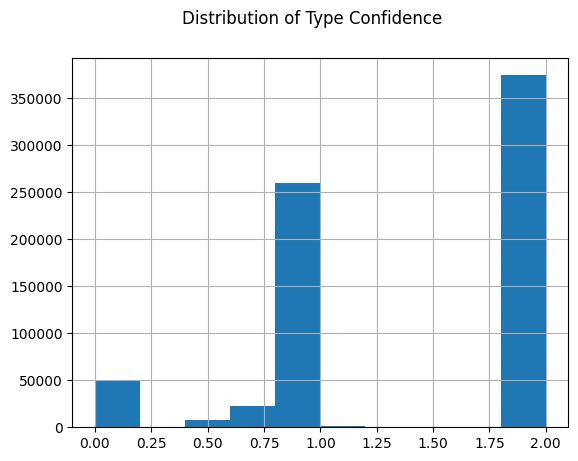

In [22]:
fig, ax = plt.subplots()
pitches.type_confidence.hist(ax=ax)
fig.suptitle("Distribution of Type Confidence")
plt.savefig("images/type_confidence_hist.png")
plt.show()

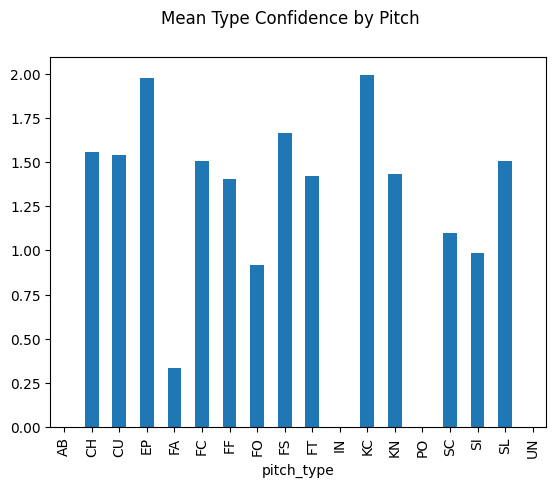

In [45]:
fig, ax = plt.subplots()
pitches.groupby("pitch_type")['type_confidence'].mean().plot.bar()
fig.suptitle("Mean Type Confidence by Pitch")
plt.savefig("images/mean_type_confidence_by_pitch_hist.png")
plt.show()

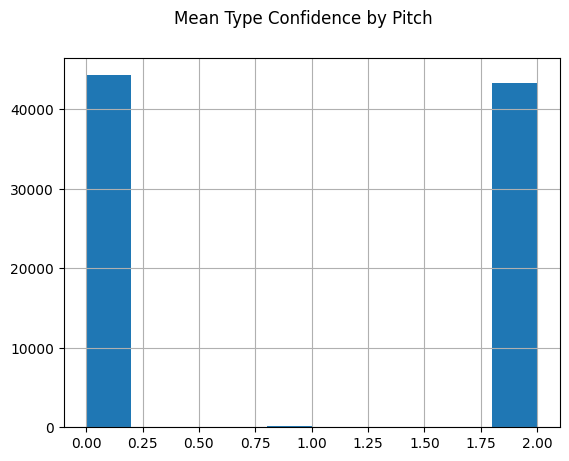

In [47]:

fig, ax = plt.subplots()
pitches.query("pitch_type == 'SI'").type_confidence.hist()
fig.suptitle("Mean Type Confidence by Pitch")
plt.savefig("images/sinker_confidence_distribution.png")
plt.show()

In [9]:
len(pitches.pitch_type.unique())

19

In [10]:
204/712604

0.00028627400351387305

In [11]:
pd.DataFrame({'percent':pitches.pitch_type.value_counts(normalize=True).round(4)*100,'count':pitches.pitch_type.value_counts()}).T

pitch_type,FF,SL,SI,FT,CH,CU,FC,FS,KC,KN,IN,PO,FO,FA,EP,SC,UN,AB
percent,33.28,15.31,12.24,11.31,10.14,7.87,5.82,1.47,1.18,0.62,0.57,0.08,0.05,0.03,0.02,0.02,0.0,0.0
count,238541.00,109756.00,87740.00,81056.00,72641.00,56379.00,41702.00,10503.00,8490.00,4450.00,4058.00,559.00,329.00,204.00,134.00,120.00,17.0,2.0


In [12]:
num_pitches_per_pitcher = pitches.groupby("pitcher_id").uid.count()

<Axes: >

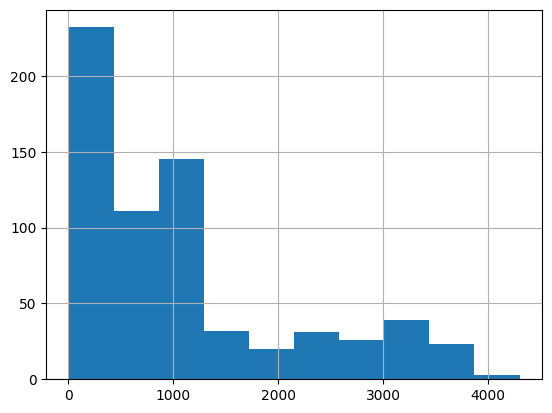

In [13]:
num_pitches_per_pitcher.hist()

In [22]:
num_pitches_per_pitcher.describe()

count     662.000000
mean     1086.043807
std      1044.893803
min         5.000000
25%       251.250000
50%       814.500000
75%      1332.000000
max      4301.000000
Name: uid, dtype: float64

In [13]:
pitch_types_to_keep = ['FF', 'FT', 'SI', 'FC', 'FS', 'SL', 'CU', 'CH', 'KC', 'KN', 'EP', 'PO', 'FO', 'FA', 'SC']
pitches_modified = pitches.query("pitch_type in @pitch_types_to_keep")

In [14]:
pitches_modified.shape

(712604, 125)

In [15]:
pd.DataFrame({'lefty':pitches_modified.query("p_throws== 'L'").pitch_type.value_counts(normalize=True), 'righty':pitches_modified.query("p_throws== 'R'").pitch_type.value_counts(normalize=True)}).sort_values('righty', ascending=False).T

pitch_type,FF,SL,SI,FT,CH,CU,FC,FS,KC,KN,PO,FO,FA,EP,SC
lefty,0.331279,0.135063,0.098466,0.157831,0.134765,0.087375,0.043037,0.001714,0.009554,NaN,0.000141,NaN,0.000293,0.000131,0.000350
righty,0.336018,0.160979,0.132177,0.097566,0.089889,0.076086,0.064204,0.019519,0.012780,0.008537,0.001021,0.000631,0.000284,0.000209,0.000102


In [15]:
pitcher_group_df = pitches_modified.groupby("pitcher_id").pitch_type.value_counts(normalize=True).unstack().fillna(0).round(3).loc[:,pitch_types_to_keep] # reorder cols

In [16]:
pitches_modified.groupby("pitcher_id").size()

pitcher_id
110683     962
112020    4127
112526    2518
115629     804
115817    2664
          ... 
573244     242
579799     762
592665     137
592704     342
599899     733
Length: 662, dtype: int64

In [17]:
pitcher_group_df['n'] = pitches_modified.groupby("pitcher_id").size()

In [18]:
pitcher_group_df

pitch_type,FF,FT,SI,FC,FS,SL,CU,CH,KC,KN,EP,PO,FO,FA,SC,n
pitcher_id,,,,,,,,,,,,,,,,
110683,0.241,0.000,0.468,0.002,0.000,0.247,0.007,0.033,0.0,0.0,0.0,0.001,0.0,0.0,0.000,962
112020,0.163,0.000,0.348,0.262,0.000,0.000,0.205,0.021,0.0,0.0,0.0,0.001,0.0,0.0,0.000,4127
112526,0.412,0.419,0.000,0.000,0.000,0.127,0.000,0.042,0.0,0.0,0.0,0.001,0.0,0.0,0.000,2518
115629,0.628,0.007,0.000,0.000,0.000,0.238,0.114,0.012,0.0,0.0,0.0,0.000,0.0,0.0,0.000,804
115817,0.131,0.000,0.349,0.000,0.000,0.271,0.150,0.098,0.0,0.0,0.0,0.001,0.0,0.0,0.000,2664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573244,0.285,0.227,0.000,0.029,0.000,0.231,0.033,0.194,0.0,0.0,0.0,0.000,0.0,0.0,0.000,242
579799,0.113,0.457,0.000,0.000,0.112,0.000,0.157,0.161,0.0,0.0,0.0,0.000,0.0,0.0,0.000,762
592665,0.650,0.044,0.000,0.000,0.000,0.241,0.000,0.066,0.0,0.0,0.0,0.000,0.0,0.0,0.000,137


In [22]:
pitcher_group_df.mean(axis=0)[0:-1]

pitch_type
FF    0.354384
FT    0.109056
SI    0.121767
FC    0.048187
FS    0.011441
SL    0.173609
CU    0.071417
CH    0.093905
KC    0.008677
KN    0.003795
EP    0.000094
PO    0.000843
FO    0.000695
FA    0.001036
SC    0.001100
dtype: float64

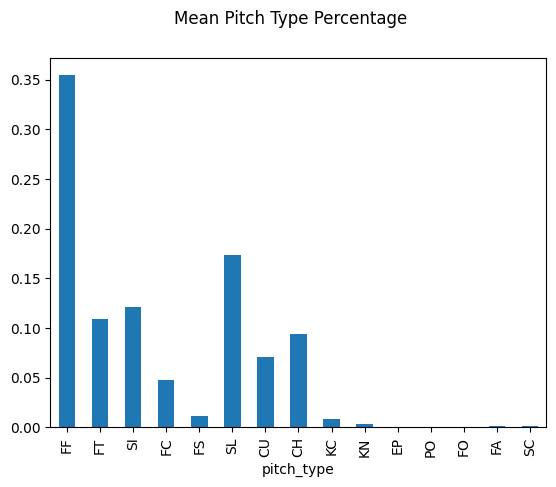

In [23]:


fig, ax = plt.subplots()
pitcher_group_df.mean(axis=0)[0:-1].plot.bar()
fig.suptitle("Mean Pitch Type Percentage")
plt.savefig("images/mean_pitch_type_percentage.png")
plt.show()

In [30]:
diff_df = (pitcher_group_df - pitcher_group_df.mean(axis=0))
diff_df['n'] = pitcher_group_df['n']


In [31]:
diff_df.sort_values("FF", ascending=False)

pitch_type,FF,FT,SI,FC,FS,SL,CU,CH,KC,KN,EP,PO,FO,FA,SC,n
pitcher_id,,,,,,,,,,,,,,,,
547973,0.484616,-0.109056,-0.121767,-0.048187,-0.011441,-0.018609,-0.071417,-0.087905,-0.008677,-0.003795,-0.000094,-0.000843,-0.000695,-0.001036,-0.0011,877
407819,0.470616,-0.070056,-0.121767,0.029813,-0.011441,-0.115609,-0.071417,-0.093905,-0.008677,-0.003795,-0.000094,-0.000843,-0.000695,-0.001036,-0.0011,1033
430629,0.463616,-0.098056,-0.121767,-0.048187,-0.011441,-0.002609,-0.071417,-0.093905,-0.008677,-0.003795,-0.000094,-0.000843,-0.000695,-0.001036,-0.0011,1023
460128,0.459616,-0.109056,-0.121767,-0.048187,-0.011441,-0.150609,-0.071417,0.069095,-0.008677,-0.003795,-0.000094,-0.000843,-0.000695,-0.001036,-0.0011,43
444874,0.451616,-0.109056,-0.121767,-0.048187,-0.011441,-0.013609,-0.071417,-0.079905,-0.008677,-0.003795,-0.000094,-0.000843,-0.000695,0.019964,-0.0011,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429440,-0.354384,-0.109056,0.466233,0.039813,-0.011441,-0.114609,-0.071417,0.171095,-0.008677,-0.003795,-0.000094,-0.000843,-0.000695,-0.001036,-0.0011,34
518715,-0.354384,-0.109056,0.545233,-0.048187,-0.011441,0.119391,-0.071417,-0.053905,-0.008677,-0.003795,-0.000094,-0.000843,-0.000695,-0.001036,-0.0011,297
408310,-0.354384,-0.109056,0.431233,-0.048187,-0.011441,-0.042609,-0.033417,0.183095,-0.008677,-0.003795,-0.000094,-0.000843,-0.000695,-0.001036,-0.0011,656


In [32]:
pitcher_group_df.loc[547973]

pitch_type
FF      0.839
FT      0.000
SI      0.000
FC      0.000
FS      0.000
SL      0.155
CU      0.000
CH      0.006
KC      0.000
KN      0.000
EP      0.000
PO      0.000
FO      0.000
FA      0.000
SC      0.000
n     877.000
Name: 547973, dtype: float64

In [29]:
97/662

0.14652567975830816

In [36]:
pitcher_group_df.sort_values("CU", ascending=False)

pitch_type,FF,FT,SI,FC,FS,SL,CU,CH,KC,KN,EP,PO,FO,FA,SC,n
pitcher_id,,,,,,,,,,,,,,,,
448179,0.000,0.246,0.000,0.0,0.0,0.000,0.754,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,130
543805,0.024,0.000,0.327,0.0,0.0,0.000,0.487,0.162,0.0,0.0,0.0,0.000,0.0,0.000,0.0,456
519259,0.030,0.000,0.506,0.0,0.0,0.000,0.464,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,869
446248,0.000,0.000,0.535,0.0,0.0,0.000,0.416,0.050,0.0,0.0,0.0,0.000,0.0,0.000,0.0,101
430587,0.303,0.225,0.000,0.0,0.0,0.000,0.408,0.064,0.0,0.0,0.0,0.000,0.0,0.000,0.0,409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467099,0.616,0.058,0.000,0.0,0.0,0.239,0.000,0.087,0.0,0.0,0.0,0.000,0.0,0.000,0.0,138
444553,0.678,0.009,0.000,0.0,0.0,0.261,0.000,0.044,0.0,0.0,0.0,0.002,0.0,0.007,0.0,1445
467008,0.290,0.255,0.000,0.0,0.0,0.402,0.000,0.054,0.0,0.0,0.0,0.000,0.0,0.000,0.0,373


In [34]:
pitches.query("pitcher_id == 110683").pitch_type.value_counts()

pitch_type
SI    450
SL    238
FF    232
CH     32
IN     18
CU      7
FC      2
PO      1
Name: count, dtype: int64

In [38]:
pitches_modified.type_confidence.describe()

count    712604.000000
mean          1.412546
std           0.653796
min           0.000000
25%           0.901000
50%           2.000000
75%           2.000000
max           2.000000
Name: type_confidence, dtype: float64

<Axes: >

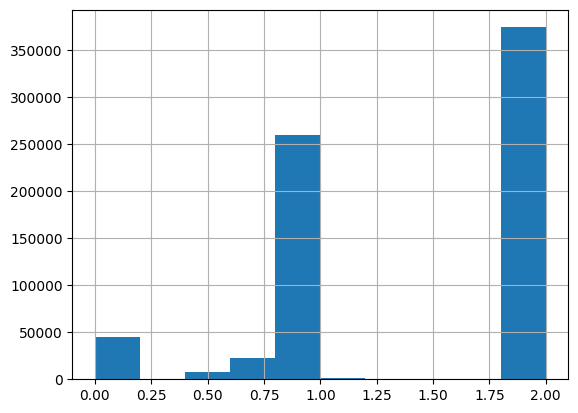

In [37]:
pitches_modified.type_confidence.hist()

In [ ]:
dataset = pd.read_pickle("data/advanced_dataset_final.pkl")

In [27]:
dataset.head()

,uid,pitch_type,type_confidence,inning,top,score_diff,at_bat_num,p_throws,pcount_pitcher,bases_state,pitcher_id,pcount_at_bat,balls,strikes,outs,stand,height_inches,prev_pitch_type,prev_type,prev_end_speed,prev_break_length,prev_break_angle,prev_break_y,prev_zone,prev_spin_dir,prev_spin_rate,prev_5_CH_%,prev_5_CU_%,prev_5_EP_%,prev_5_FC_%,prev_5_FF_%,prev_5_FO_%,prev_5_FS_%,prev_5_FT_%,prev_5_KC_%,prev_5_KN_%,prev_5_SC_%,prev_5_SI_%,prev_5_SL_%,prev_10_CH_%,prev_10_CU_%,prev_10_EP_%,prev_10_FC_%,prev_10_FF_%,prev_10_FO_%,prev_10_FS_%,prev_10_FT_%,prev_10_KC_%,prev_10_KN_%,prev_10_SC_%,prev_10_SI_%,prev_10_SL_%,prev_20_CH_%,prev_20_CU_%,prev_20_EP_%,prev_20_FC_%,prev_20_FF_%,prev_20_FO_%,prev_20_FS_%,prev_20_FT_%,prev_20_KC_%,prev_20_KN_%,prev_20_SC_%,prev_20_SI_%,prev_20_SL_%,prev_5_B_%,prev_5_S_%,prev_5_X_%,prev_10_B_%,prev_10_S_%,prev_10_X_%,prev_20_B_%,prev_20_S_%,prev_20_X_%,historical_CH_%,historical_CU_%,historical_EP_%,historical_FC_%,historical_FF_%,historical_FO_%,historical_FS_%,historical_FT_%,historical_KC_%,historical_KN_%,historical_SC_%,historical_SI_%,historical_SL_%,pit_v_bat_CH_%,pit_v_bat_CU_%,pit_v_bat_EP_%,pit_v_bat_FC_%,pit_v_bat_FF_%,pit_v_bat_FO_%,pit_v_bat_FS_%,pit_v_bat_FT_%,pit_v_bat_KC_%,pit_v_bat_KN_%,pit_v_bat_SC_%,pit_v_bat_SI_%,pit_v_bat_SL_%,historical_batter_B_%,historical_batter_S_%,historical_batter_X_%
353274,14143252,FF,2.0,1,False,0,7,R,1,000,450308,1,0,0,0,R,70,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353275,14143253,FF,2.0,1,False,0,7,R,2,000,450308,2,0,1,0,R,70,FF,R,81.4,2.8,-0.7,23.9,8.0,183.148,2519.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
353276,14143254,FF,2.0,1,False,0,7,R,3,000,450308,3,1,1,0,R,70,FF,R,84.0,1.9,6.9,23.8,12.0,187.663,2838.803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
353277,14143255,FF,2.0,1,False,0,7,R,4,000,450308,4,2,1,0,R,70,FF,R,83.8,2.3,-12.4,23.9,14.0,179.643,2701.919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
353278,14143256,FF,2.0,1,False,0,7,R,5,000,450308,5,2,2,0,R,70,FF,R,84.0,2.1,0.1,23.8,3.0,184.623,2683.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [23]:

train_index_stop = 569484 # this is the first index of a new pitcher
val_index_stop = 640690 # make sure no overlapping plays

training_set = dataset.iloc[0:train_index_stop, :]
validation_set = dataset.iloc[train_index_stop:val_index_stop, :]
test_set = dataset.iloc[val_index_stop:,]

train_X = training_set.drop(["uid", "pitch_type", "type_confidence", "pitcher_id"],axis=1)
train_y = training_set['pitch_type']
train_weights = training_set['type_confidence']

val_X = validation_set.drop(["uid", "pitch_type", "type_confidence", "pitcher_id"],axis=1)
val_y = validation_set['pitch_type']
val_weights = validation_set['type_confidence']

test_X = test_set.drop(["uid", "pitch_type", "type_confidence", "pitcher_id"],axis=1)
test_y = test_set['pitch_type']
test_weights = test_set['type_confidence']

In [25]:
train_y.value_counts()

pitch_type
FF    189393
SL     88095
SI     71735
FT     64430
CH     58601
CU     44918
FC     33036
FS      8337
KC      6783
KN      3677
FO       295
EP       101
SC        83
Name: count, dtype: int64

In [26]:
val_y.value_counts(normalize=True)

pitch_type
FF    0.345420
SL    0.153976
FT    0.118206
SI    0.114611
CH    0.096396
CU    0.077367
FC    0.059082
FS    0.015954
KC    0.011642
KN    0.006558
SC    0.000323
EP    0.000267
FO    0.000197
Name: proportion, dtype: float64